# Olist exploring data lab

### Introduction

Now that we have cleaned and selected our data, the next step is to explore it.

### Loading our data

In [2]:
import pandas as pd
selected_df = pd.read_csv('./olist_2017_2018.csv')

In [3]:
selected_df[:2]

,customer_zip_code_prefix,customer_city,customer_state,product_category_name,order_id,customer_id,product_id,price,purchase_timeYear,purchase_timeMonth,purchase_timeWeek,purchase_timeDay,purchase_timeDayofweek,purchase_timeDayofyear,purchase_timeElapsed
0,3149,sao paulo,SP,utilidades_domesticas,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,87285b34884572647811a353c7ac498a,29.99,2017,10,40,2,0,275,1506941793
1,88032,florianopolis,SC,utilidades_domesticas,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,87285b34884572647811a353c7ac498a,29.99,2017,10,43,23,0,296,1508801206


In [25]:
target_cols = 'price'

id_cols = ['order_id', 'customer_id', 'product_id']
geo_cols = ['customer_zip_code_prefix']
customer_cols = ['customer_city', 'customer_state']
product_cols = ['product_category_name']
purchase_time_cols = ['purchase_timeYear', 'purchase_timeMonth', 'purchase_timeWeek',
       'purchase_timeDay', 'purchase_timeDayofweek', 'purchase_timeDayofyear',
       'purchase_timeElapsed']

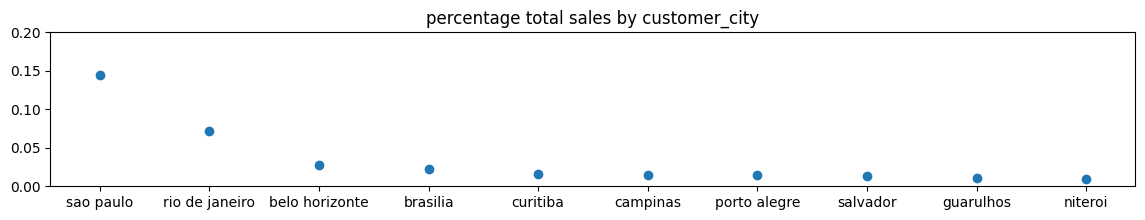

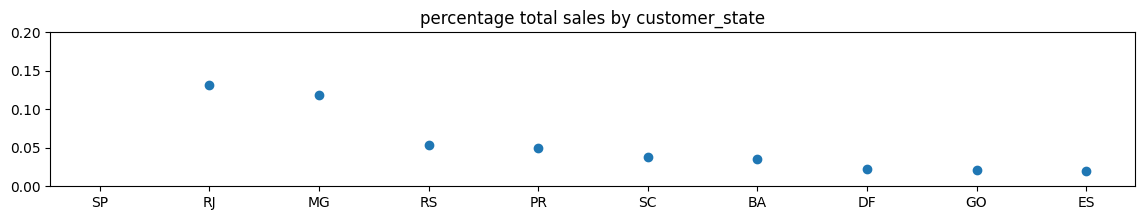

In [68]:
from item_lib import *

target = 'price'
agg_name = 'percentage total sales'

geo_results = build_and_print(selected_df, customer_cols,
                              target, agg = 'sum',
                              agg_name = agg_name, y_range=[0, .2])

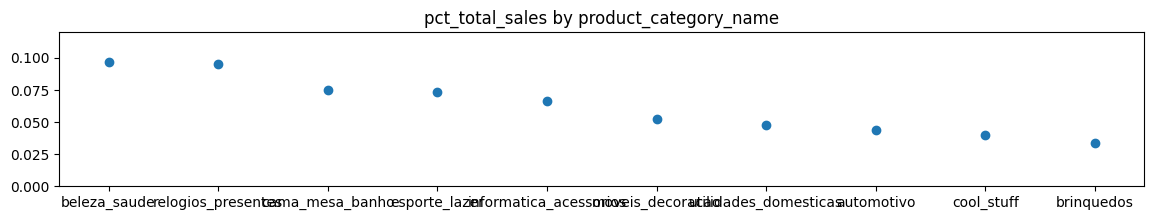

In [6]:
results = build_and_print(selected_df, product_cols,
                          target, agg = 'sum', 
                          agg_name = 'pct_total_sales',
                          y_range=[0, .12])

In [24]:
indexed_by_category = results['product_category_name'].reset_index()
# indexed_by_category[:3]

In [8]:
indexed_cumsum = indexed_by_category.assign(cum_pct = indexed_by_category['pct_total_sales'].cumsum())
indexed_cumsum[:3]

,product_category_name,pct_total_sales,cum_pct
0,beleza_saude,0.097,0.097
1,relogios_presentes,0.095,0.192
2,cama_mesa_banho,0.075,0.267


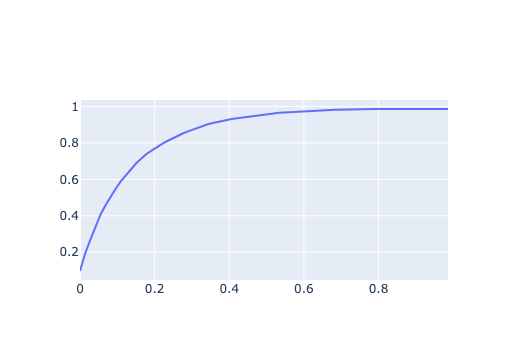

In [18]:
import plotly.graph_objects as go
scatter = go.Scatter(x = indexed_cumsum.index/73, y = indexed_cumsum['cum_pct'])
go.Figure(scatter)

In [22]:
indexed_cumsum[:5]

,product_category_name,pct_total_sales,cum_pct
0,beleza_saude,0.097,0.097
1,relogios_presentes,0.095,0.192
2,cama_mesa_banho,0.075,0.267
3,esporte_lazer,0.073,0.340
4,informatica_acessorios,0.066,0.406


* So above notice the top five percent of categories account for forty percent of our sales.

In [ ]:
geo_results = build_and_print(selected_df, customer_cols, target, agg = 'sum', agg_name = agg_name, y_range=[0, .2])

#### Digging deeper 

From here, let's see if there are ways to market these kinds of products.  For example, it could be that they are popular in different regions or sold at different times.

In [62]:
top_products = indexed_cumsum[:5].product_category_name.tolist()
print(top_products)
# 

['beleza_saude', 'relogios_presentes', 'cama_mesa_banho', 'esporte_lazer', 'informatica_acessorios']


In [63]:
beleza_saude_df = selected_df[selected_df['product_category_name'] == 'beleza_saude']
beleza_saude_df[:5]

,customer_zip_code_prefix,customer_city,customer_state,product_category_name,order_id,customer_id,product_id,price,purchase_timeYear,purchase_timeMonth,purchase_timeWeek,purchase_timeDay,purchase_timeDayofweek,purchase_timeDayofyear,purchase_timeElapsed
329,4001,sao paulo,SP,beleza_saude,203096f03d82e0dffbc41ebc2e2bcfb7,d2b091571da224a1b36412c18bc3bbfe,5ac9d9e379c606e36a8094a6046f75dc,109.90,2017,9,38,18,0,261,1505745090
330,41650,salvador,BA,beleza_saude,d30680568af2e9f0aeba3420292df26d,8eb5e45df7b0f27cc1a3b7ba46219180,5ac9d9e379c606e36a8094a6046f75dc,109.90,2017,9,37,16,5,259,1505553626
331,25635,petropolis,RJ,beleza_saude,b87c9466fb7a6b04a632222b07c1922d,f69987b9f125768a2cf3243679536a80,5ac9d9e379c606e36a8094a6046f75dc,109.90,2017,9,37,15,4,258,1505476788
332,21555,rio de janeiro,RJ,beleza_saude,04031be66943a9c385ff683fcc99d288,b9313515b2c2bfce4c61816d2b0b9217,5ac9d9e379c606e36a8094a6046f75dc,109.90,2017,9,37,16,5,259,1505529086
333,8473,sao paulo,SP,beleza_saude,f848643eec1d69395095eb3840d2051e,4fa1cd166fa598be6de80fa84eaade43,2b4609f8948be18874494203496bc318,79.99,2018,3,11,15,3,74,1521103960


In [ ]:
target_cols = 'price'

id_cols = ['order_id', 'customer_id', 'product_id']
geo_cols = ['customer_zip_code_prefix']
customer_cols = ['customer_city', 'customer_state']
product_cols = ['product_category_name']
purchase_time_cols = ['purchase_timeYear', 'purchase_timeMonth', 'purchase_timeWeek',
       'purchase_timeDay', 'purchase_timeDayofweek', 'purchase_timeDayofyear',
       'purchase_timeElapsed']

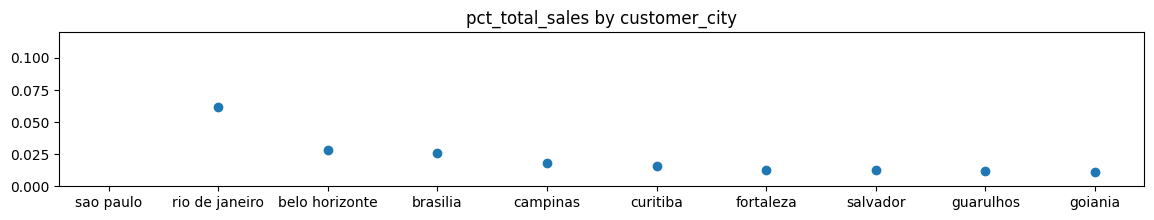

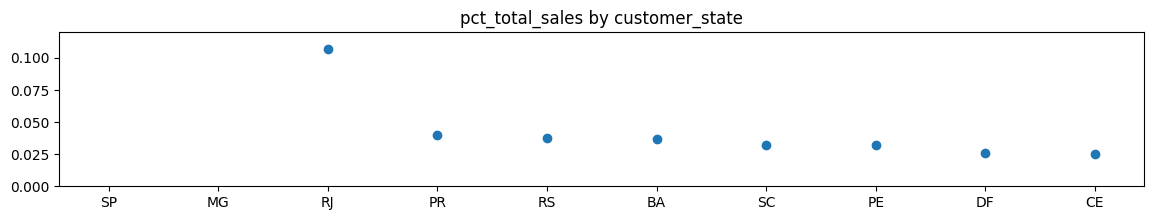

In [74]:
customer_results_beleza = build_and_print(beleza_saude_df, customer_cols, target, agg = 'sum', 
                          agg_name = 'pct_total_sales', y_range=[0, .12])

Looking at the above, the customer results look similar to our overall data.

And what if we compare to zipcodes of this product, to sales by zipcode overall.

In [84]:
zipcode_results_beleza['customer_zip_code_prefix'][:5]

,pct_total_sales
customer_zip_code_prefix,
36570,0.004
35501,0.004
97015,0.003
19901,0.003
70670,0.003


In [89]:
zipcode_results_overall = build_grouped_by(selected_df, geo_cols, target,
                                          agg = 'sum',
                                          agg_name = None, pct = True)


zipcode_results_overall[:5]

,sum
customer_zip_code_prefix,
35501,0.002
22790,0.002
22793,0.001
36570,0.001
29102,0.001


* It does look like there are differences between where these top products are sold and the geographic breakdown in sales, in general.  
    * In the short term, this can help us with inventory managment -- making sure that we deliver products to this market.
    * Over the longer term, we could look to see marketing opportunities with insight.  Can we market to the product to similar zipcodes?  Is there a reason why sales of the product lag in other zipcodes?  This may involve both qualitative and quantitative info.
    

* Timing breakdown of product

In [91]:
purchase_time_cols = ['purchase_timeMonth', 'purchase_timeWeek']

# , 'purchase_timeWeek', 'purchase_timeDayofyear', 'purchase_timeElapsed'

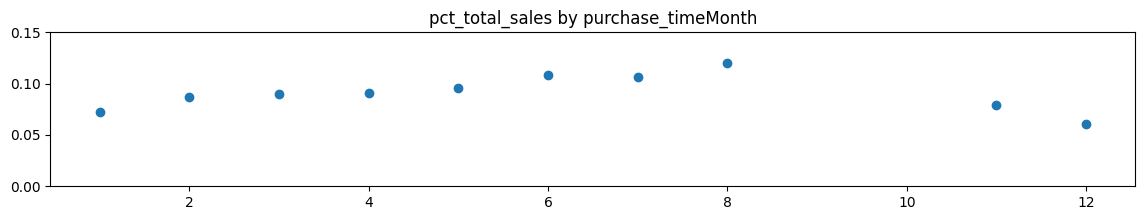

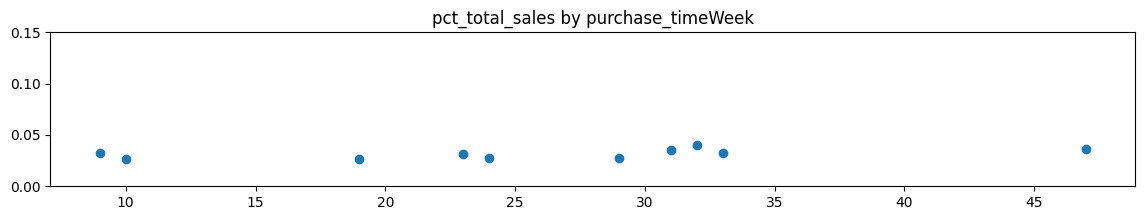

In [93]:
beleza_saude_time_df = build_and_print(beleza_saude_df, purchase_time_cols, target, agg = 'sum', 
                          agg_name = 'pct_total_sales', y_range=[0, .15])

How does this compare to sales overall per week?

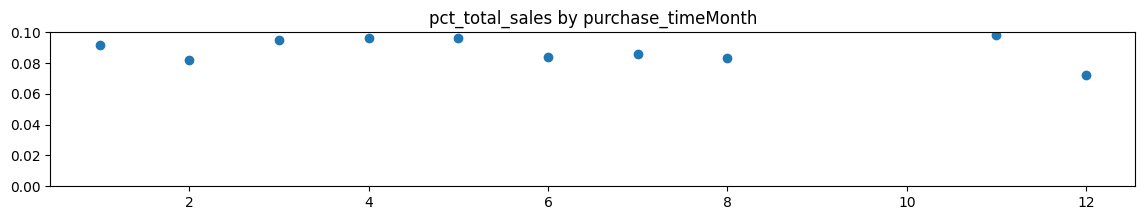

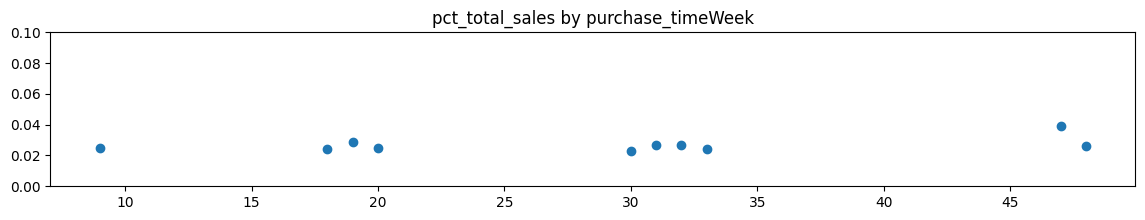

In [107]:
selected_time_df = build_and_print(selected_df, purchase_time_cols, target, agg = 'sum', 
                          agg_name = 'pct_total_sales', y_range=[0, .10])

* Looking at a breakdown in time, it looks like the product is more popular when overall sales are higher -- which is expected.  However, sales are more clustered by a specific week with beleza_saude.  It may be interesting to look further at those weeks, to get a sense of what drives sales.  We could also promote/stock certain products on certain weeks, if we think they are more likely to be sold then.

## Zipcode Data

In [47]:
df_zip_price = selected_df[['customer_zip_code_prefix', 'price']]
sorted_by_zip = df_zip_price.groupby('customer_zip_code_prefix').sum().sort_values('price', ascending = False)
pct_running_price = sorted_by_zip['price'].cumsum()/sorted_by_zip['price'].sum()
cum_by_zip = sorted_by_zip.assign(running_total = pct_running_price)
cum_by_zip[:10]

,price,running_total
customer_zip_code_prefix,,
35501,17748.04,0.001714
22790,16976.60,0.003354
22793,14840.63,0.004787
36570,14614.93,0.006198
29102,14203.63,0.007570
24230,14096.67,0.008932
20080,13697.22,0.010254
24220,13412.18,0.011550
22775,13107.76,0.012816


In [ ]:
geo_cols = ['customer_zip_code_prefix']

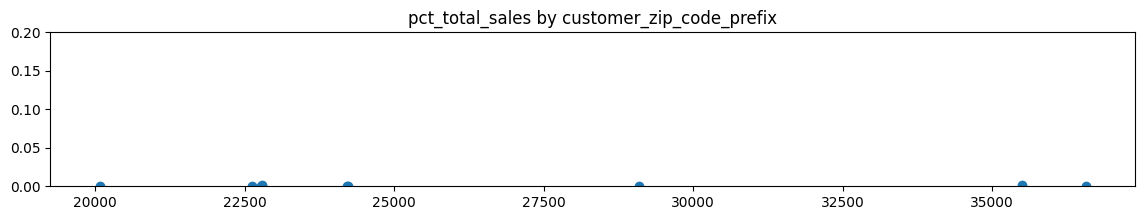

In [30]:
from item_lib import *

target = 'price'
agg_name = 'pct_total_sales'

results = build_and_print(selected_df, geo_cols, 
                          target, agg = 'sum',
                          agg_name = agg_name,
                          y_range=[0, .2])

In [33]:
pct_zip = results['customer_zip_code_prefix']
pct_zip[:5]

,pct_total_sales
customer_zip_code_prefix,
35501,0.002
22790,0.002
22793,0.001
36570,0.001
29102,0.001


Here too, our data is pretty spread out.

* The top nine percent of zipcodes account for 40% of our sales

In [24]:
groupedby_zip = selected_df.groupby('customer_zip_code_prefix').sum()[['price']]
grouped_price = groupedby_zip.sort_values('price', ascending = False)
cum_price_df = grouped_price.assign(pct_price = grouped_price['price'].cumsum()/grouped_price['price'].sum()).round(4)
cum_price_df_idx = cum_price_df.reset_index()

/var/folders/56/76xkbl_1039gpjh3w47v01980000gn/T/ipykernel_11961/2313259945.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  groupedby_zip = selected_df.groupby('customer_zip_code_prefix').sum()[['price']]


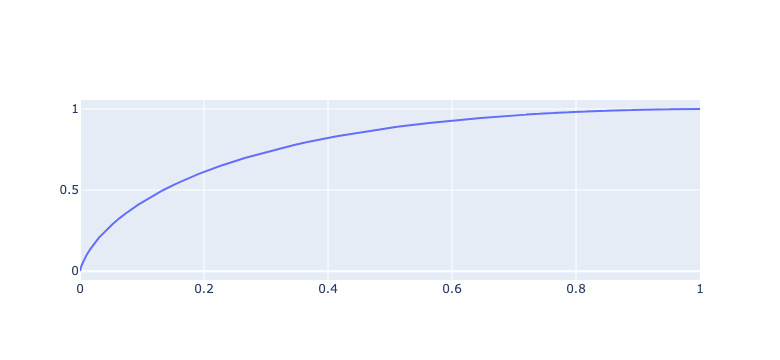

In [30]:
import plotly.graph_objects as go
scatter = go.Scatter(x = cum_price_df_idx.index/14018, y = cum_price_df_idx.pct_price)
go.Figure(scatter)

In [49]:
selected_cum = cum_price_df_idx[:100]

In [53]:
selected_cum[:3]

,customer_zip_code_prefix,pct_total_sales,cum_percent
0,35501,0.002,0.002
1,22790,0.002,0.004
2,22793,0.001,0.005


### Timing Data

In [122]:
# selected_df.sort_values('purchase_timeElapsed', ascending = True)

In [113]:
# 9, 247 day, week 36, 2017 through 9 sept, 246, 36, 2018 

* Perhaps look at week year over year from september through september
    * And can do by geography and by product
    
* While comparing raw yoy may not, work, instead could compare market share per year *

* [Customer lifetime value](https://www.kaggle.com/code/leewanhung/clustering-consumers-by-lifetime-value)
* Folium Quickstart?

[Bokeh](https://www.kaggle.com/code/andresionek/geospatial-analysis-of-brazilian-e-commerce)

[Plotting Resources](https://levelup.gitconnected.com/visualizing-housing-data-with-folium-maps-4718ed3452c2)